In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pgmpy

In [2]:
from pgmpy.models import BayesianModel

from pgmpy.factors.discrete import TabularCPD 

In [3]:
model = BayesianModel([('Smokes', 'Lung Disease'),
                       ('Lung Disease', 'Chest Pain'),
                       ('Lung Disease', 'Shortness of Breath'),
                       ('Lung Disease', 'Cough'),
                       ('Cold', 'Cough'),
                       ('Cold', 'Fever')])

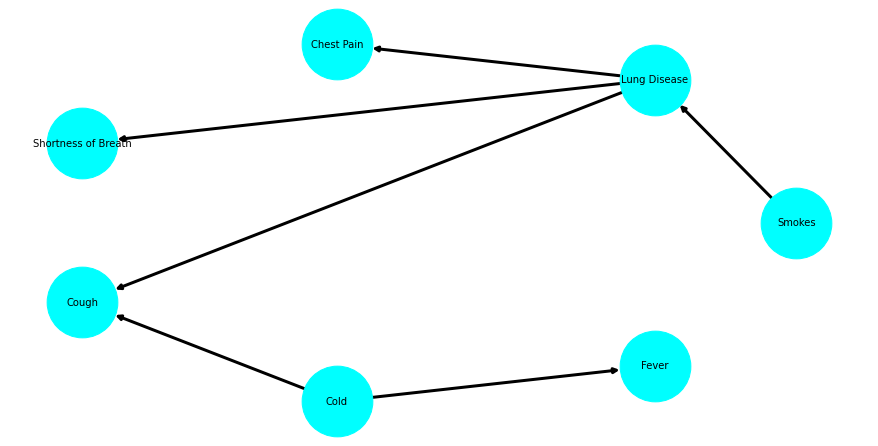

In [4]:
import networkx as nx

plt.figure(figsize = (12, 6))

nx.draw(model, pos = nx.circular_layout(model), with_labels = True, node_size = 5000, 
        node_color = 'cyan', width = 3, font_size = 10)

plt.show()

## Define cpd objects

In [5]:
#P(Smokes)
cpd_smokes = TabularCPD(variable = 'Smokes', 
                        variable_card = 2, 
                        values = [[0.2], [0.8]],
                        state_names = {'Smokes': ['Yes', 'No']})

print(cpd_smokes)

+-------------+-----+
| Smokes(Yes) | 0.2 |
+-------------+-----+
| Smokes(No)  | 0.8 |
+-------------+-----+


In [6]:
#P(Cold)
cpd_cold = TabularCPD(variable = 'Cold', 
                      variable_card = 2, 
                      values = [[0.02], [0.98]],
                      state_names = {'Cold': ['Yes', 'No']})

print(cpd_cold)

+-----------+------+
| Cold(Yes) | 0.02 |
+-----------+------+
| Cold(No)  | 0.98 |
+-----------+------+


In [7]:
#P(Lung Disease|Smokes)
cpd_lung_dis = TabularCPD(variable = 'Lung Disease', 
                          variable_card = 2, 
                          values = [[0.1009,0.001],
                                    [0.8991,0.999]],
                          evidence = ['Smokes'],
                          evidence_card = [2], 
                          state_names = {'Lung Disease': ['Yes', 'No'], 
                                         'Smokes': ['Yes', 'No']})

print(cpd_lung_dis)

+-------------------+-------------+------------+
| Smokes            | Smokes(Yes) | Smokes(No) |
+-------------------+-------------+------------+
| Lung Disease(Yes) | 0.1009      | 0.001      |
+-------------------+-------------+------------+
| Lung Disease(No)  | 0.8991      | 0.999      |
+-------------------+-------------+------------+


In [8]:
#P(Shortness of Breath|Lung Disease)
cpd_short_breath = TabularCPD(variable = 'Shortness of Breath', 
                              variable_card = 2, 
                              values = [[0.208, 0.01],
                                        [0.792, 0.99]],
                              evidence = ['Lung Disease'],
                              evidence_card = [2],
                              state_names = {'Shortness of Breath': ['Yes', 'No'],
                                             'Lung Disease': ['Yes', 'No']})

print(cpd_short_breath)

+--------------------------+-------------------+------------------+
| Lung Disease             | Lung Disease(Yes) | Lung Disease(No) |
+--------------------------+-------------------+------------------+
| Shortness of Breath(Yes) | 0.208             | 0.01             |
+--------------------------+-------------------+------------------+
| Shortness of Breath(No)  | 0.792             | 0.99             |
+--------------------------+-------------------+------------------+


In [9]:
#P(Chest Pain|Lung Disease)
cpd_chest_pain = TabularCPD(variable = 'Chest Pain', 
                            variable_card = 2,
                            values = [[0.178, 0.05],
                                       [0.822, 0.95]],
                            evidence = ['Lung Disease'],
                            evidence_card = [2],
                            state_names = {'Chest Pain': ['Yes', 'No'],
                                           'Lung Disease': ['Yes', 'No']})

print(cpd_chest_pain)

+-----------------+-------------------+------------------+
| Lung Disease    | Lung Disease(Yes) | Lung Disease(No) |
+-----------------+-------------------+------------------+
| Chest Pain(Yes) | 0.178             | 0.05             |
+-----------------+-------------------+------------------+
| Chest Pain(No)  | 0.822             | 0.95             |
+-----------------+-------------------+------------------+


In [10]:
#P(Fever|Cold)
cpd_fever = TabularCPD(variable = 'Fever', 
                       variable_card = 2,
                       values = [[0.307, 0.03],
                                 [0.693, 0.97]],
                       evidence = ['Cold'],
                       evidence_card = [2],
                       state_names = {'Fever': ['Yes', 'No'],
                                      'Cold': ['Yes', 'No']})                         

print(cpd_fever)

+------------+-----------+----------+
| Cold       | Cold(Yes) | Cold(No) |
+------------+-----------+----------+
| Fever(Yes) | 0.307     | 0.03     |
+------------+-----------+----------+
| Fever(No)  | 0.693     | 0.97     |
+------------+-----------+----------+


In [11]:
#P(Cough|Lung Disease,Cold)
cpd_cough = TabularCPD(variable = 'Cough', 
                       variable_card = 2,
                       values = [[0.7525, 0.505, 0.505, 0.07],
                                 [0.2475, 0.495, 0.495, 0.93]],
                       evidence = ['Lung Disease', 'Cold'],
                       evidence_card = [2, 2], 
                       state_names = {'Cough': ['Yes', 'No'],
                                      'Lung Disease': ['Yes', 'No'],
                                      'Cold': ['Yes', 'No']})

print(cpd_cough)

+--------------+-------------------+-------------------+------------------+------------------+
| Lung Disease | Lung Disease(Yes) | Lung Disease(Yes) | Lung Disease(No) | Lung Disease(No) |
+--------------+-------------------+-------------------+------------------+------------------+
| Cold         | Cold(Yes)         | Cold(No)          | Cold(Yes)        | Cold(No)         |
+--------------+-------------------+-------------------+------------------+------------------+
| Cough(Yes)   | 0.7525            | 0.505             | 0.505            | 0.07             |
+--------------+-------------------+-------------------+------------------+------------------+
| Cough(No)    | 0.2475            | 0.495             | 0.495            | 0.93             |
+--------------+-------------------+-------------------+------------------+------------------+


## Associate cpd objects with model

In [12]:
model.add_cpds(cpd_smokes,
               cpd_cold, 
               cpd_lung_dis, 
               cpd_short_breath,
               cpd_chest_pain, 
               cpd_cough,
               cpd_fever)

model

## Check model

Check if model is correctly defined and all probabilities add to 1.

In [13]:
model.check_model()

True

Model is well-formed.

## Investigate model

In [14]:
model.get_cpds()

[<TabularCPD representing P(Smokes:2) at 0x1392c3f40>,
 <TabularCPD representing P(Cold:2) at 0x10ec7aa30>,
 <TabularCPD representing P(Lung Disease:2 | Smokes:2) at 0x1392c3550>,
 <TabularCPD representing P(Shortness of Breath:2 | Lung Disease:2) at 0x1397afe20>,
 <TabularCPD representing P(Chest Pain:2 | Lung Disease:2) at 0x10ec7ac40>,
 <TabularCPD representing P(Cough:2 | Lung Disease:2, Cold:2) at 0x1392abd30>,
 <TabularCPD representing P(Fever:2 | Cold:2) at 0x10ec7ae20>]

In [15]:
model.get_independencies() # check independencies

(Smokes ⟂ Fever, Cold)
(Smokes ⟂ Fever, Cold | Chest Pain)
(Smokes ⟂ Cold | Fever)
(Smokes ⟂ Chest Pain, Cough, Fever, Shortness of Breath, Cold | Lung Disease)
(Smokes ⟂ Fever, Cold | Shortness of Breath)
(Smokes ⟂ Fever | Cold)
(Smokes ⟂ Cold | Chest Pain, Fever)
(Smokes ⟂ Cough, Shortness of Breath, Cold, Fever | Lung Disease, Chest Pain)
(Smokes ⟂ Fever, Cold | Chest Pain, Shortness of Breath)
(Smokes ⟂ Fever | Chest Pain, Cold)
(Smokes ⟂ Chest Pain, Shortness of Breath, Cold, Fever | Lung Disease, Cough)
(Smokes ⟂ Fever | Cough, Cold)
(Smokes ⟂ Chest Pain, Cough, Shortness of Breath, Cold | Lung Disease, Fever)
(Smokes ⟂ Cold | Fever, Shortness of Breath)
(Smokes ⟂ Chest Pain, Cough, Cold, Fever | Lung Disease, Shortness of Breath)
(Smokes ⟂ Chest Pain, Cough, Shortness of Breath, Fever | Lung Disease, Cold)
(Smokes ⟂ Fever | Shortness of Breath, Cold)
(Smokes ⟂ Fever, Shortness of Breath, Cold | Lung Disease, Chest Pain, Cough)
(Smokes ⟂ Fever | Chest Pain, Cough, Cold)
(Smokes ⟂

In [16]:
model.local_independencies('Smokes')

(Smokes ⟂ Fever, Cold)

In [17]:
model.local_independencies('Lung Disease')

(Lung Disease ⟂ Fever, Cold | Smokes)

Conditional probability P(|Smokes) implies dependency b/ween 'Lung Disease' & 'Smokes'

In [18]:
model.local_independencies('Shortness of Breath')

(Shortness of Breath ⟂ Chest Pain, Cough, Fever, Cold, Smokes | Lung Disease)

Conditional probability P(|Lung Disease) implies dependency b/ween Lung 'Shortness of Breath' & 'Lung Disease'

In [19]:
model.local_independencies('Cold')

(Cold ⟂ Lung Disease, Chest Pain, Shortness of Breath, Smokes)

In [20]:
model.local_independencies('Fever')

(Fever ⟂ Chest Pain, Cough, Lung Disease, Shortness of Breath, Smokes | Cold)

Conditional probability P(|Cold) implies dependency b/ween 'Fever' & 'Cold'

In [21]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

infer

## Compute probabilities from Bayesian Networks

In [22]:
p_dist_cold = infer.query(['Cold'])

print(p_dist_cold)

Eliminating: Smokes: 100%|██████████| 6/6 [00:00<00:00, 139.63it/s]    

+-----------+-------------+
| Cold      |   phi(Cold) |
+===========+=============+
| Cold(Yes) |      0.0200 |
+-----------+-------------+
| Cold(No)  |      0.9800 |
+-----------+-------------+


Cold has no dependencies... thus for cold marginal probabilites = absolute probabilities

In [23]:
p_dist_lung_dis = infer.query(['Lung Disease'])

print(p_dist_lung_dis)

Eliminating: Smokes: 100%|██████████| 6/6 [00:00<00:00, 124.61it/s]

+-------------------+---------------------+
| Lung Disease      |   phi(Lung Disease) |
+===================+=====================+
| Lung Disease(Yes) |              0.0210 |
+-------------------+---------------------+
| Lung Disease(No)  |              0.9790 |
+-------------------+---------------------+


In [24]:
p_dist_chest_pain = infer.query(['Chest Pain'])

print(p_dist_chest_pain)


Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Cough:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Fever:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Shortness of Breath:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: Lung Disease:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: Cold:   0%|          | 0/6 [00:00<?, ?it/s]        

Eliminating: Smokes: 100%|██████████| 6/6 [00:00<00:00, 138.01it/s]

+-----------------+-------------------+
| Chest Pain      |   phi(Chest Pain) |
+=================+===================+
| Chest Pain(Yes) |            0.0527 |
+-----------------+-------------------+
| Chest Pain(No)  |            0.9473 |
+-----------------+-------------------+


In [25]:
p_dist_cough = infer.query(['Cough'])

print(p_dist_cough)



  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]


  0%|          | 0/6 [00:00<?, ?it/s]


Eliminating: Chest Pain:   0%|          | 0/6 [00:00<?, ?it/s]


Eliminating: Fever:   0%|          | 0/6 [00:00<?, ?it/s]     


Eliminating: Shortness of Breath:   0%|          | 0/6 [00:00<?, ?it/s]


Eliminating: Lung Disease:   0%|          | 0/6 [00:00<?, ?it/s]       


Eliminating: Cold:   0%|          | 0/6 [00:00<?, ?it/s]        


Eliminating: Smokes: 100%|██████████| 6/6 [00:00<00:00, 221.86it/s]

+------------+--------------+
| Cough      |   phi(Cough) |
+============+==============+
| Cough(Yes) |       0.0877 |
+------------+--------------+
| Cough(No)  |       0.9123 |
+------------+--------------+


In [26]:
#joint probabilities
print(infer.query(['Cold', 'Cough', 'Lung Disease'], joint = True))




  0%|          | 0/4 [00:00<?, ?it/s]


Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]



  0%|          | 0/4 [00:00<?, ?it/s]



Eliminating: Chest Pain:   0%|          | 0/4 [00:00<?, ?it/s]



Eliminating: Shortness of Breath:   0%|          | 0/4 [00:00<?, ?it/s]



Eliminating: Smokes:   0%|          | 0/4 [00:00<?, ?it/s]             



Eliminating: Fever: 100%|██████████| 4/4 [00:00<00:00, 142.09it/s]A

+-------------------+-----------+------------+--------------------------------+
| Lung Disease      | Cold      | Cough      |   phi(Lung Disease,Cold,Cough) |
+===================+===========+============+================================+
| Lung Disease(Yes) | Cold(Yes) | Cough(Yes) |                         0.0003 |
+-------------------+-----------+------------+--------------------------------+
| Lung Disease(Yes) | Cold(Yes) | Cough(No)  |                         0.0001 |
+-------------------+-----------+------------+--------------------------------+
| Lung Disease(Yes) | Cold(No)  | Cough(Yes) |                         0.0104 |
+-------------------+-----------+------------+--------------------------------+
| Lung Disease(Yes) | Cold(No)  | Cough(No)  |                         0.0102 |
+-------------------+-----------+------------+--------------------------------+
| Lung Disease(No)  | Cold(Yes) | Cough(Yes) |                         0.0099 |
+-------------------+-----------+-------

In [27]:
#conditional probabilities
print(infer.query(['Cough'], evidence = {'Cold': 'Yes'}))





  0%|          | 0/5 [00:00<?, ?it/s]



Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]




  0%|          | 0/5 [00:00<?, ?it/s]




Eliminating: Chest Pain:   0%|          | 0/5 [00:00<?, ?it/s]




Eliminating: Fever:   0%|          | 0/5 [00:00<?, ?it/s]     




Eliminating: Shortness of Breath:   0%|          | 0/5 [00:00<?, ?it/s]




Eliminating: Lung Disease:   0%|          | 0/5 [00:00<?, ?it/s]       




Eliminating: Smokes: 100%|██████████| 5/5 [00:00<00:00, 160.78it/s]

+------------+--------------+
| Cough      |   phi(Cough) |
+============+==============+
| Cough(Yes) |       0.5102 |
+------------+--------------+
| Cough(No)  |       0.4898 |
+------------+--------------+


In [28]:
#conditional probabilities
print(infer.query(['Cough'], evidence = {'Cold': 'No'}))






  0%|          | 0/5 [00:00<?, ?it/s]




Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]





  0%|          | 0/5 [00:00<?, ?it/s]





Eliminating: Chest Pain:   0%|          | 0/5 [00:00<?, ?it/s]





Eliminating: Fever:   0%|          | 0/5 [00:00<?, ?it/s]     





Eliminating: Shortness of Breath:   0%|          | 0/5 [00:00<?, ?it/s]





Eliminating: Lung Disease:   0%|          | 0/5 [00:00<?, ?it/s]       





Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 79.93it/s]

+------------+--------------+
| Cough      |   phi(Cough) |
+============+==============+
| Cough(Yes) |       0.0791 |
+------------+--------------+
| Cough(No)  |       0.9209 |
+------------+--------------+


In [29]:
#conditional probabilities
print(infer.query(['Lung Disease'], evidence = {'Cough': 'Yes'}))

Eliminating: Smokes: 100%|██████████| 5/5 [00:00<00:00, 133.49it/s]

+-------------------+---------------------+
| Lung Disease      |   phi(Lung Disease) |
+===================+=====================+
| Lung Disease(Yes) |              0.1219 |
+-------------------+---------------------+
| Lung Disease(No)  |              0.8781 |
+-------------------+---------------------+


In [30]:
#conditional probabilities
print(infer.query(['Chest Pain'], evidence = {'Smokes': 'Yes'}))


Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Cough:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Fever:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Shortness of Breath:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: Lung Disease:   0%|          | 0/5 [00:00<?, ?it/s]       

Eliminating: Cold: 100%|██████████| 5/5 [00:00<00:00, 141.05it/s][A

+-----------------+-------------------+
| Chest Pain      |   phi(Chest Pain) |
+=================+===================+
| Chest Pain(Yes) |            0.0629 |
+-----------------+-------------------+
| Chest Pain(No)  |            0.9371 |
+-----------------+-------------------+
